In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.impute import SimpleImputer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 파일 읽기

In [2]:
# 파일 경로
file_path = 'data/cmm_data.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 결측치 확인 및 X와 y 생성

In [3]:
# 결측치 및 데이터 타입 확인
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

# '품명' 열 제외
data_numeric = data.drop(columns=['품명'])

# 결측치를 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# 데이터프레임으로 변환
data_imputed = pd.DataFrame(data_imputed, columns=data_numeric.columns)

# 독립 변수와 종속 변수 분리
X = data_imputed.drop(columns=['품질상태'])
y = data_imputed['품질상태']

In [4]:
X

,편차_각도1 <- 각도[XYPLAN]:직선2와 직선3 Ang,편차_각도2 <- 각도[XYPLAN]:직선23와 직선24 Ang,편차_거리1 <- XAXIS[PT]:점9와 점10 <상> DS,편차_거리2 <- XAXIS[PT]:점14와 점15 <하> DS,편차_거리3 <- XYPLAN[PT]:원5와 원통1 DS,편차_거리4 <- XAXIS[평균]:점32와 점31 <소재기준> DS,편차_원1(I) <상> D,편차_원2(I) <중> D,편차_원3(I) <하> D,편차_원4(E) <소재> D,...,편차_직선21 <우하 소재> X/Y,편차_직선25 <- 직선18의 되부름 X/Y,편차_직선26 <- 직선16의 되부름 X/Y,편차_직선4 <27° 소재> Y/X,편차_직선5 <7.5° 소재> Y/X,편차_직선6 <35.9° 소재> Y/X,편차_직선7 <23.1°> Y/X,편차_직선8 <6°> Y/X,편차_평면2 Z,"편차_평면3 <- 점21, 점22, 점23, ... , 점26의 측정점 병합 <마이크로미터로 측정 해볼 것 !!!!!!!!!!!!!!!!> Z"
0,0.303,-0.023,0.037,0.016,-0.001,0.037,0.010,0.014,0.013,-0.381,...,1.439,0.075,-0.009,0.235,-0.060,-0.156,0.167,0.228,0.282,0.517
1,0.239,-0.009,0.046,0.021,0.030,0.046,0.010,0.014,0.011,-0.374,...,-0.050,0.063,-0.039,0.258,-0.049,-0.177,0.178,0.218,0.264,0.461
2,0.129,0.067,0.046,0.051,0.040,0.046,0.011,0.015,0.017,-0.371,...,-0.157,0.045,-0.180,0.226,-0.047,-0.159,0.168,0.224,0.219,0.369
3,0.256,-0.148,0.053,0.017,0.022,0.053,0.012,0.018,0.018,-0.379,...,-0.096,0.144,-0.007,0.224,-0.015,-0.122,0.146,0.185,0.250,0.459
4,0.205,-0.133,0.037,0.007,0.024,0.037,0.009,0.015,0.011,-0.380,...,0.039,0.030,-0.068,0.214,-0.038,-0.141,0.193,0.231,0.250,0.517
5,0.336,-0.014,0.034,-0.004,-0.006,0.034,0.010,0.013,0.014,-0.375,...,-0.026,0.058,-0.059,0.216,-0.043,-0.153,0.197,0.241,0.258,0.458
6,0.242,0.013,0.050,0.030,0.008,0.050,0.012,0.017,0.013,-0.374,...,0.077,0.103,-0.016,0.252,-0.014,-0.093,0.162,0.203,0.240,0.488


In [5]:
y

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    0.0
6    1.0
Name: 품질상태, dtype: float64

# 데이터 스케일링

In [6]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train

2    1.0
4    1.0
3    1.0
6    1.0
Name: 품질상태, dtype: float64

In [7]:
# 특징 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # X 대신 X_train 사용
X_test = scaler.transform(X_test)

In [10]:
import numpy as np

In [11]:
# PyTorch Tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values.astype(np.float32))  # y 대신 y_train 사용
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values.astype(np.float32))

# 데이터 로더 생성
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_50560\1496888818.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)


# 이전 분류 딥러닝 모델 정의

In [12]:
# 모델 클래스 정의
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 12)
        self.fc2 = nn.Linear(12, 8)
        self.fc3 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [13]:
# 모델 초기화
model = BinaryClassifier()

# 손실 함수 및 최적화기
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 기록을 위한 리스트 초기화
epoch_losses = []
epoch_accuracies = []


# 학습 (TRAINING)

In [14]:
# 훈련 루프
for epoch in range(50):
    total_loss = 0
    correct = 0
    total = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.view(-1, 1))
        total_loss += loss.item()
        predicted = output.round()
        correct += (predicted == target.view(-1, 1)).sum().item()
        total += target.size(0)
        loss.backward()
        optimizer.step()
    
    epoch_loss = total_loss / len(train_loader)
    epoch_accuracy = correct / total
    epoch_losses.append(epoch_loss)
    epoch_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}')

Epoch 1: Loss = 0.4848, Accuracy = 0.2500
Epoch 2: Loss = 0.4835, Accuracy = 0.2500
Epoch 3: Loss = 0.4823, Accuracy = 0.2500
Epoch 4: Loss = 0.4810, Accuracy = 0.2500
Epoch 5: Loss = 0.4798, Accuracy = 0.2500
Epoch 6: Loss = 0.4786, Accuracy = 0.2500
Epoch 7: Loss = 0.4776, Accuracy = 0.2500
Epoch 8: Loss = 0.4765, Accuracy = 0.2500
Epoch 9: Loss = 0.4754, Accuracy = 0.2500
Epoch 10: Loss = 0.4744, Accuracy = 0.5000
Epoch 11: Loss = 0.4733, Accuracy = 0.5000
Epoch 12: Loss = 0.4722, Accuracy = 0.5000
Epoch 13: Loss = 0.4710, Accuracy = 0.5000
Epoch 14: Loss = 0.4699, Accuracy = 0.5000
Epoch 15: Loss = 0.4687, Accuracy = 0.5000
Epoch 16: Loss = 0.4674, Accuracy = 0.7500
Epoch 17: Loss = 0.4662, Accuracy = 0.7500
Epoch 18: Loss = 0.4649, Accuracy = 0.7500
Epoch 19: Loss = 0.4636, Accuracy = 0.7500
Epoch 20: Loss = 0.4623, Accuracy = 0.7500
Epoch 21: Loss = 0.4609, Accuracy = 0.7500
Epoch 22: Loss = 0.4595, Accuracy = 0.7500
Epoch 23: Loss = 0.4581, Accuracy = 0.7500
Epoch 24: Loss = 0.4

In [15]:
# 모델 평가
with torch.no_grad():
    output = model(X_test)
    predicted = output.round()  # 0.5 이상을 1로, 미만을 0으로
    accuracy = (predicted == y_test.view(-1, 1)).sum().item() / len(y_test)
    print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.6666666666666666


# 시각화

In [16]:
import matplotlib.pyplot as plt

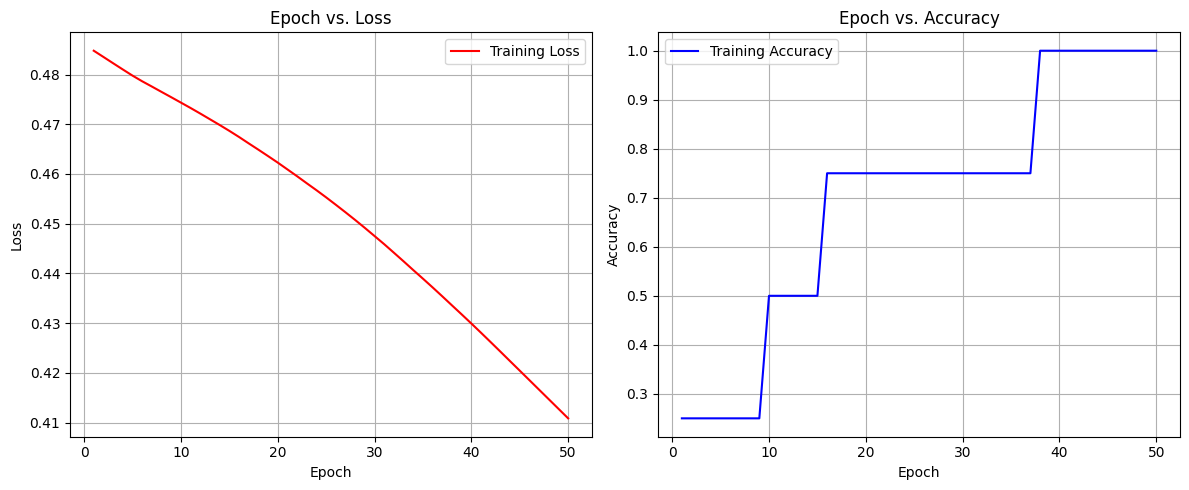

In [18]:
epochs = list(range(1, 51))

# Loss 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, epoch_losses, label='Training Loss', color='red')
plt.title('Epoch vs. Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, epoch_accuracies, label='Training Accuracy', color='blue')
plt.title('Epoch vs. Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()